## Imports
All necessary imports are done at the start of the notebook in order to keep the file systematic and clean.

In [65]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## Data Loading

First the training, test, and sample submission files are loaded from the Kaggle Input directory.

In [66]:
train_df = pd.read_csv('/content/estate_train.csv')
test_df = pd.read_csv('/content/estate_test.csv')
sample_submission = pd.read_csv('/content/estate_sample_submission.csv')

In [67]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IncomeLevel        16512 non-null  float64
 1   PropertyAge        15199 non-null  float64
 2   TotalRooms         16512 non-null  float64
 3   TotalBedrooms      16512 non-null  float64
 4   NeighborhoodPop    16512 non-null  float64
 5   AvgOccupancy       16512 non-null  float64
 6   Latitude           16512 non-null  float64
 7   Longitude          16512 non-null  float64
 8   TargetPrice        16512 non-null  float64
 9   PropertyID         16512 non-null  object 
 10  RoomsPerHousehold  16512 non-null  float64
 11  BedroomsRatio      16512 non-null  float64
dtypes: float64(11), object(1)
memory usage: 1.5+ MB
None


In [68]:
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4128 entries, 0 to 4127
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IncomeLevel        4128 non-null   float64
 1   PropertyAge        3773 non-null   float64
 2   TotalRooms         4128 non-null   float64
 3   TotalBedrooms      4128 non-null   float64
 4   NeighborhoodPop    4128 non-null   float64
 5   AvgOccupancy       4128 non-null   float64
 6   Latitude           4128 non-null   float64
 7   Longitude          4128 non-null   float64
 8   PropertyID         4128 non-null   object 
 9   RoomsPerHousehold  4128 non-null   float64
 10  BedroomsRatio      4128 non-null   float64
dtypes: float64(10), object(1)
memory usage: 354.9+ KB
None


In [69]:
print(sample_submission.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4128 entries, 0 to 4127
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PropertyID   4128 non-null   object 
 1   TargetPrice  4128 non-null   float64
dtypes: float64(1), object(1)
memory usage: 64.6+ KB
None


## Descriptive Statistics


In [70]:
display(train_df.describe())

,IncomeLevel,PropertyAge,TotalRooms,TotalBedrooms,NeighborhoodPop,AvgOccupancy,Latitude,Longitude,TargetPrice,RoomsPerHousehold,BedroomsRatio
count,16512.000000,15199.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,3.880870,28.610537,5.435311,1.096797,1426.441888,3.097123,35.643149,-119.582290,2.071947,1.980582,0.212858
std,1.906229,12.604955,2.387346,0.433573,1137.594296,11.589701,2.136665,2.005654,1.156226,1.125818,0.057995
min,0.409295,0.567139,0.973695,0.329765,-44.578990,0.579087,32.550000,-124.350000,0.149990,0.002547,0.100000
25%,2.564153,18.195306,4.450483,1.005528,788.555955,2.362349,33.930000,-121.810000,1.198000,1.526243,0.175178
50%,3.544769,28.747429,5.238836,1.049505,1169.707835,2.835532,34.260000,-118.510000,1.798500,1.941541,0.202808
75%,4.779065,37.045296,6.064049,1.102542,1730.584980,3.364962,37.720000,-118.010000,2.651250,2.300615,0.239501
max,15.113356,53.490497,141.875493,25.630214,35739.248210,1243.662159,41.950000,-114.310000,5.000010,52.033333,1.000000


In [71]:
display(test_df.describe())

,IncomeLevel,PropertyAge,TotalRooms,TotalBedrooms,NeighborhoodPop,AvgOccupancy,Latitude,Longitude,RoomsPerHousehold,BedroomsRatio
count,4128.000000,3773.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.00000,4128.00000,4128.000000,4128.000000
mean,3.830719,28.682060,5.401898,1.096816,1421.374588,2.966576,35.58671,-119.51936,1.962518,0.213941
std,1.883274,12.494979,2.796817,0.610529,1115.473556,1.755270,2.13276,1.99447,1.223534,0.058135
min,0.530203,0.715202,0.813320,0.510180,-37.000397,1.236617,32.54000,-124.19000,0.061605,0.108164
25%,2.554915,18.259809,4.386189,1.002786,781.260054,2.432482,33.93000,-121.69000,1.511737,0.176204
50%,3.486886,29.027066,5.184169,1.046765,1161.163505,2.818464,34.23000,-118.47000,1.925748,0.204279
75%,4.661292,37.123820,6.011166,1.099233,1726.571176,3.296391,37.70000,-117.99000,2.277103,0.240804
max,15.095812,52.829456,132.566404,34.063426,16116.561421,83.223442,41.81000,-114.58000,55.222222,1.000000


In [72]:
num_feature = train_df.select_dtypes(include = ['int64' , 'float64']).columns
print("Numerical Columns:",num_feature)

cat_feature = train_df.select_dtypes(include = ['object']).columns
print("Categorical Columns:",cat_feature)

Numerical Columns: Index(['IncomeLevel', 'PropertyAge', 'TotalRooms', 'TotalBedrooms',
       'NeighborhoodPop', 'AvgOccupancy', 'Latitude', 'Longitude',
       'TargetPrice', 'RoomsPerHousehold', 'BedroomsRatio'],
      dtype='object')
Categorical Columns: Index(['PropertyID'], dtype='object')


In [73]:
print(f"\nMissing values in Training Data:\n{train_df.isnull().sum()}")
print(f"\nDuplicates in Training Dataset: {train_df.duplicated().sum()}")


Missing values in Training Data:
IncomeLevel             0
PropertyAge          1313
TotalRooms              0
TotalBedrooms           0
NeighborhoodPop         0
AvgOccupancy            0
Latitude                0
Longitude               0
TargetPrice             0
PropertyID              0
RoomsPerHousehold       0
BedroomsRatio           0
dtype: int64

Duplicates in Training Dataset: 0


In [74]:
print(f"\nMissing values in Test Data:\n{test_df.isnull().sum()}")
print(f"\nDuplicates in Test Dataset: {test_df.duplicated().sum()}")


Missing values in Test Data:
IncomeLevel            0
PropertyAge          355
TotalRooms             0
TotalBedrooms          0
NeighborhoodPop        0
AvgOccupancy           0
Latitude               0
Longitude              0
PropertyID             0
RoomsPerHousehold      0
BedroomsRatio          0
dtype: int64

Duplicates in Test Dataset: 0


In [75]:
print(f"\nMissing values in Sample Submission Data:\n{sample_submission.isnull().sum()}")
print(f"\nDuplicates in Sample Submission Dataset: {sample_submission.duplicated().sum()}")


Missing values in Sample Submission Data:
PropertyID     0
TargetPrice    0
dtype: int64

Duplicates in Sample Submission Dataset: 0


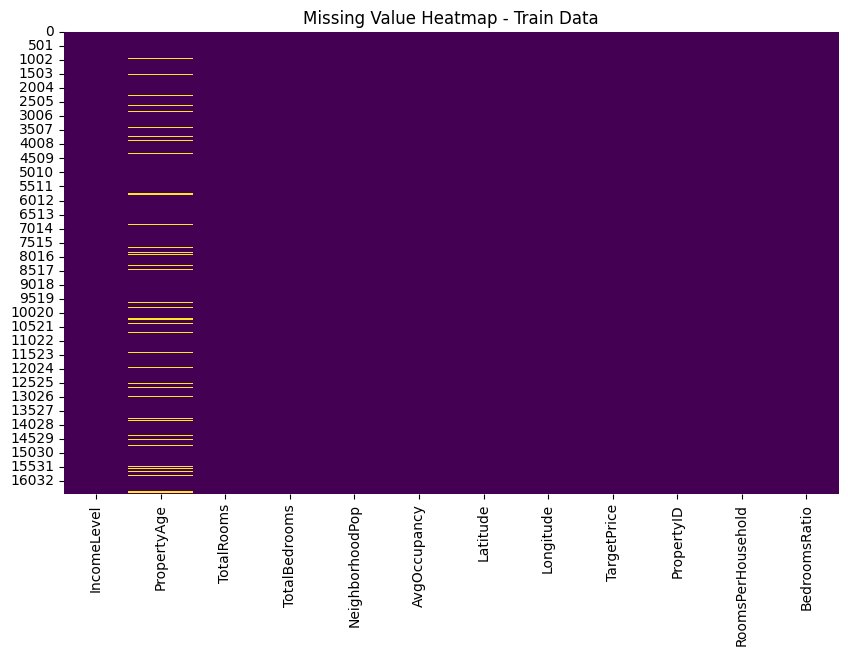

In [76]:
plt.figure(figsize=(10, 6))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Value Heatmap - Train Data")
plt.show()

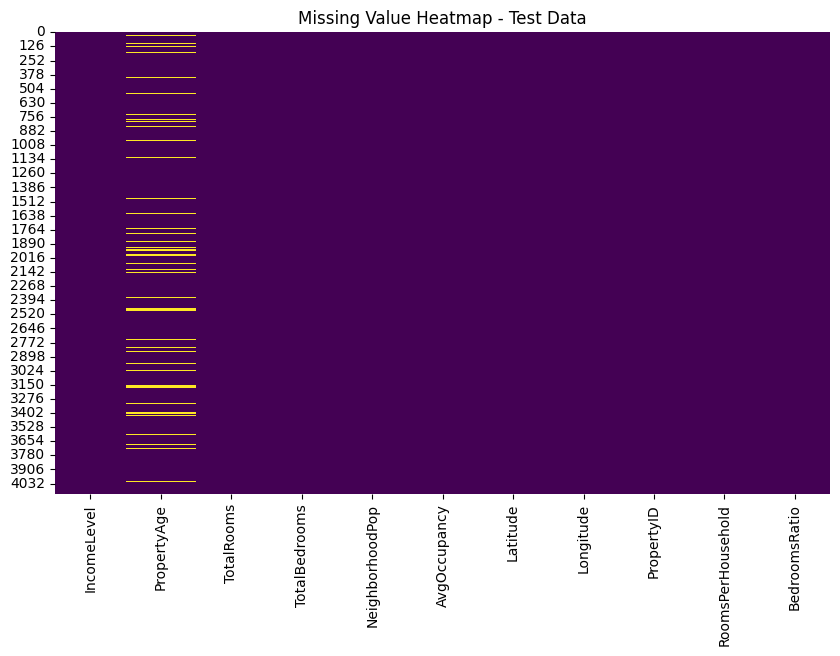

In [77]:
plt.figure(figsize=(10, 6))
sns.heatmap(test_df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Value Heatmap - Test Data")
plt.show()

In [78]:
import warnings
warnings.filterwarnings("ignore")

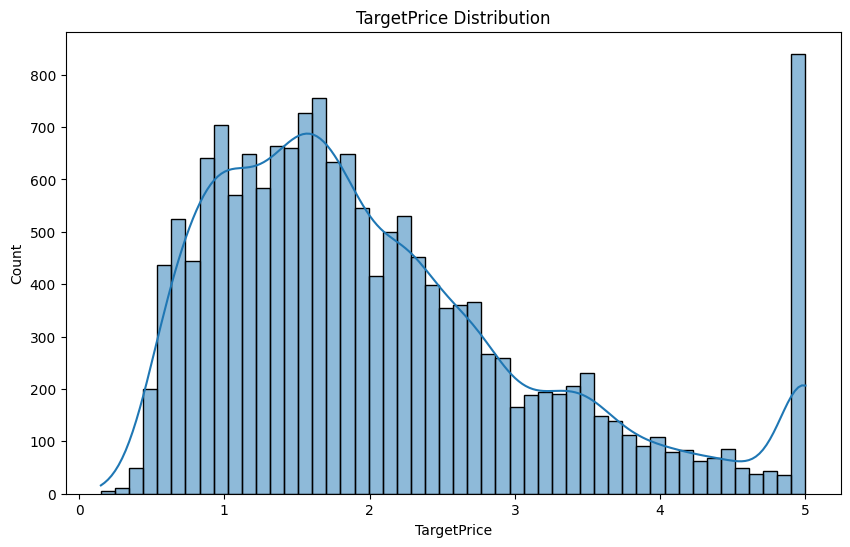

In [79]:
plt.figure(figsize=(10,6))
sns.histplot(train_df['TargetPrice'], bins=50, kde=True)
plt.title('TargetPrice Distribution')
plt.show()

## Houses by Property Age

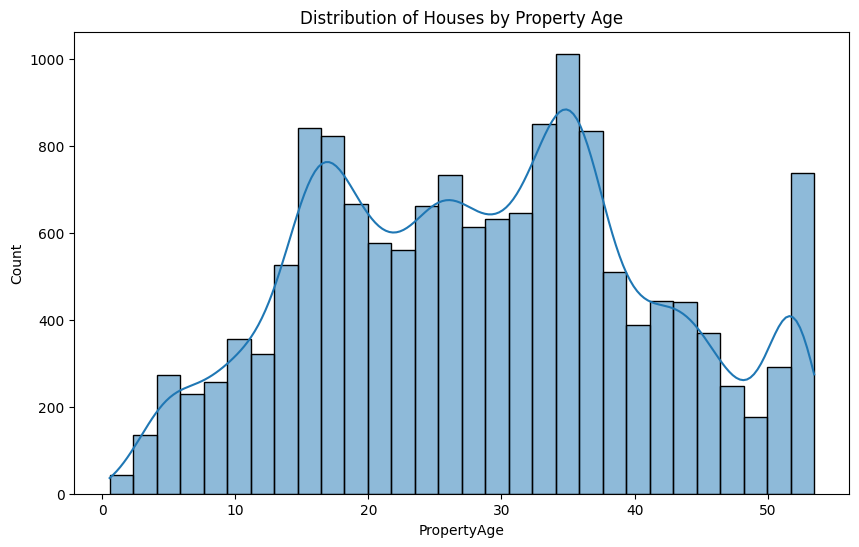

In [80]:
plt.figure(figsize=(10,6))
sns.histplot(data=train_df, x='PropertyAge', bins=30, kde=True)
plt.title('Distribution of Houses by Property Age')
plt.show()

## Property Age vs Target Price

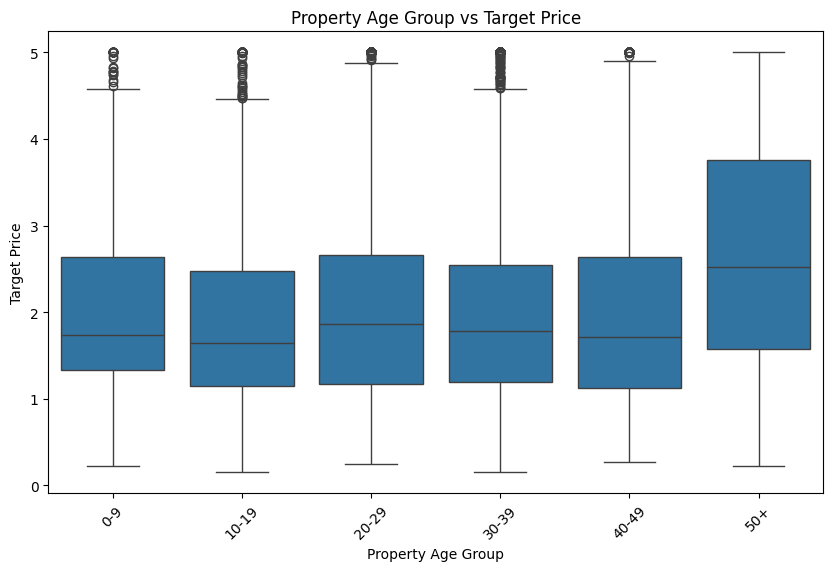

In [81]:
temp_train_df = train_df.copy()
bins = [0, 10, 20, 30, 40, 50, 60]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50+']
temp_train_df['PropertyAgeGroup'] = pd.cut(temp_train_df['PropertyAge'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10,6))
sns.boxplot(data=temp_train_df, x='PropertyAgeGroup', y='TargetPrice')
plt.title('Property Age Group vs Target Price')
plt.xticks(rotation=45)
plt.xlabel('Property Age Group')
plt.ylabel('Target Price')
plt.show()

## Total Rooms Vs Target Price

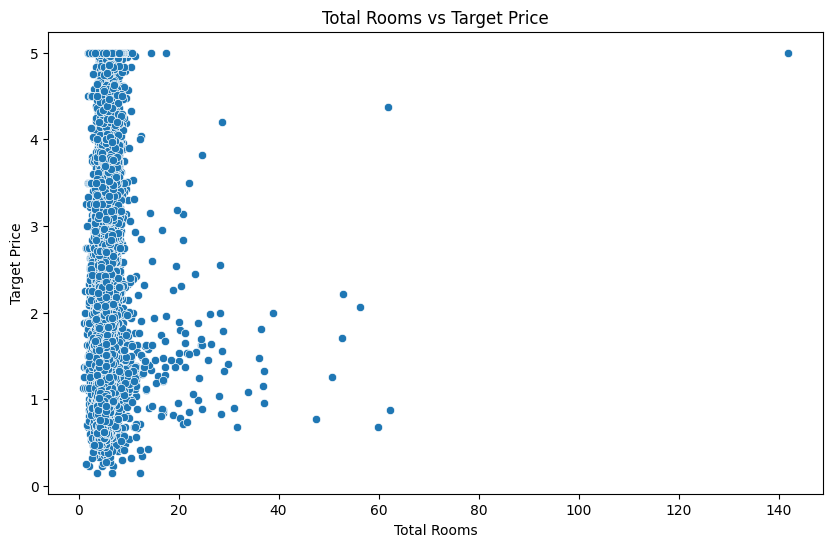

In [82]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=train_df, x='TotalRooms', y='TargetPrice')
plt.title('Total Rooms vs Target Price')
plt.xlabel('Total Rooms')
plt.ylabel('Target Price')
plt.show()

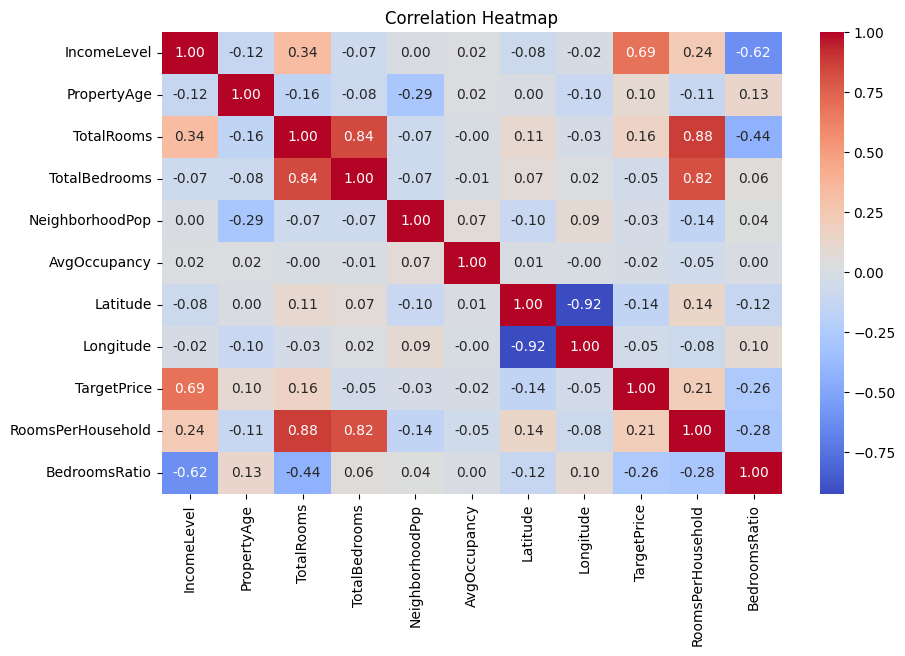

In [83]:
plt.figure(figsize=(10, 6))
sns.heatmap(train_df.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='coolwarm',fmt='0.2f')
plt.title("Correlation Heatmap")
plt.show()

In [84]:
target_col = "TargetPrice"
X = train_df.drop(columns=[target_col, 'PropertyID'])
y = np.log1p(train_df[target_col])

X['PropertyAge'] = X['PropertyAge'].fillna(X['PropertyAge'].median())
test_df['PropertyAge'] = test_df['PropertyAge'].fillna(X['PropertyAge'].median())

def add_features(df):
    df['total_rooms_per_pop'] = df['TotalRooms'] / (df['NeighborhoodPop'] + 1)
    df['bedroom_per_room'] = df['TotalBedrooms'] / (df['TotalRooms'] + 1)
    df['location_sum'] = df['Latitude'] + df['Longitude']
    return df

X = add_features(X)
X_test = add_features(test_df.drop(columns=['PropertyID']))

## Encoding and Feature Scaling


In [85]:
features = X.columns.tolist()

scaler = StandardScaler()
X[features] = scaler.fit_transform(X[features])
X_test[features] = scaler.transform(X_test[features])

In [86]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
def assess_model_performance(y_true, y_pred, name):
    root_mean_squared_error = np.sqrt(mean_squared_error(y_true, y_pred))
    r2_score_value = r2_score(y_true, y_pred)
    mean_absolute_error_value = mean_absolute_error(y_true, y_pred)
    print(f"{name}: RMSE = {root_mean_squared_error:.2f}, MAE = {mean_absolute_error_value:.2f}, R² = {r2_score_value:.4f}")
    return root_mean_squared_error, mean_absolute_error_value, r2_score_value

# AI Model Training and hypertuning

In [88]:
trained_models = {}
performance_metrics = {}

## Training

In [89]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred_val = lm.predict(X_val)
rmse, mae, r2 = assess_model_performance(y_val, y_pred_val, "Linear Regression")
trained_models["Linear Regression"] = lm
performance_metrics["Linear Regression"] = {'RMSE': rmse, 'MAE': mae, 'R2': r2}

Linear Regression: RMSE = 0.21, MAE = 0.16, R² = 0.6721


In [90]:
print("The intercept term of the linear model:", lm.intercept_)

The intercept term of the linear model: 1.0577336226638743


In [91]:
print("The coefficients of the linear model:", lm.coef_)

The coefficients of the linear model: [ 0.22675509  0.02555424  0.0080385  -0.12143483  0.01136422  0.00181336
 -0.02631517 -0.02194988  0.15330744 -0.0444396  -0.01159818  0.13560589
 -0.12299176]


In [92]:
cdf = pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=["Coefficients"])
cdf

,Coefficients
IncomeLevel,0.226755
PropertyAge,0.025554
TotalRooms,0.008038
TotalBedrooms,-0.121435
NeighborhoodPop,0.011364
AvgOccupancy,0.001813
Latitude,-0.026315
Longitude,-0.021950
RoomsPerHousehold,0.153307
BedroomsRatio,-0.044440


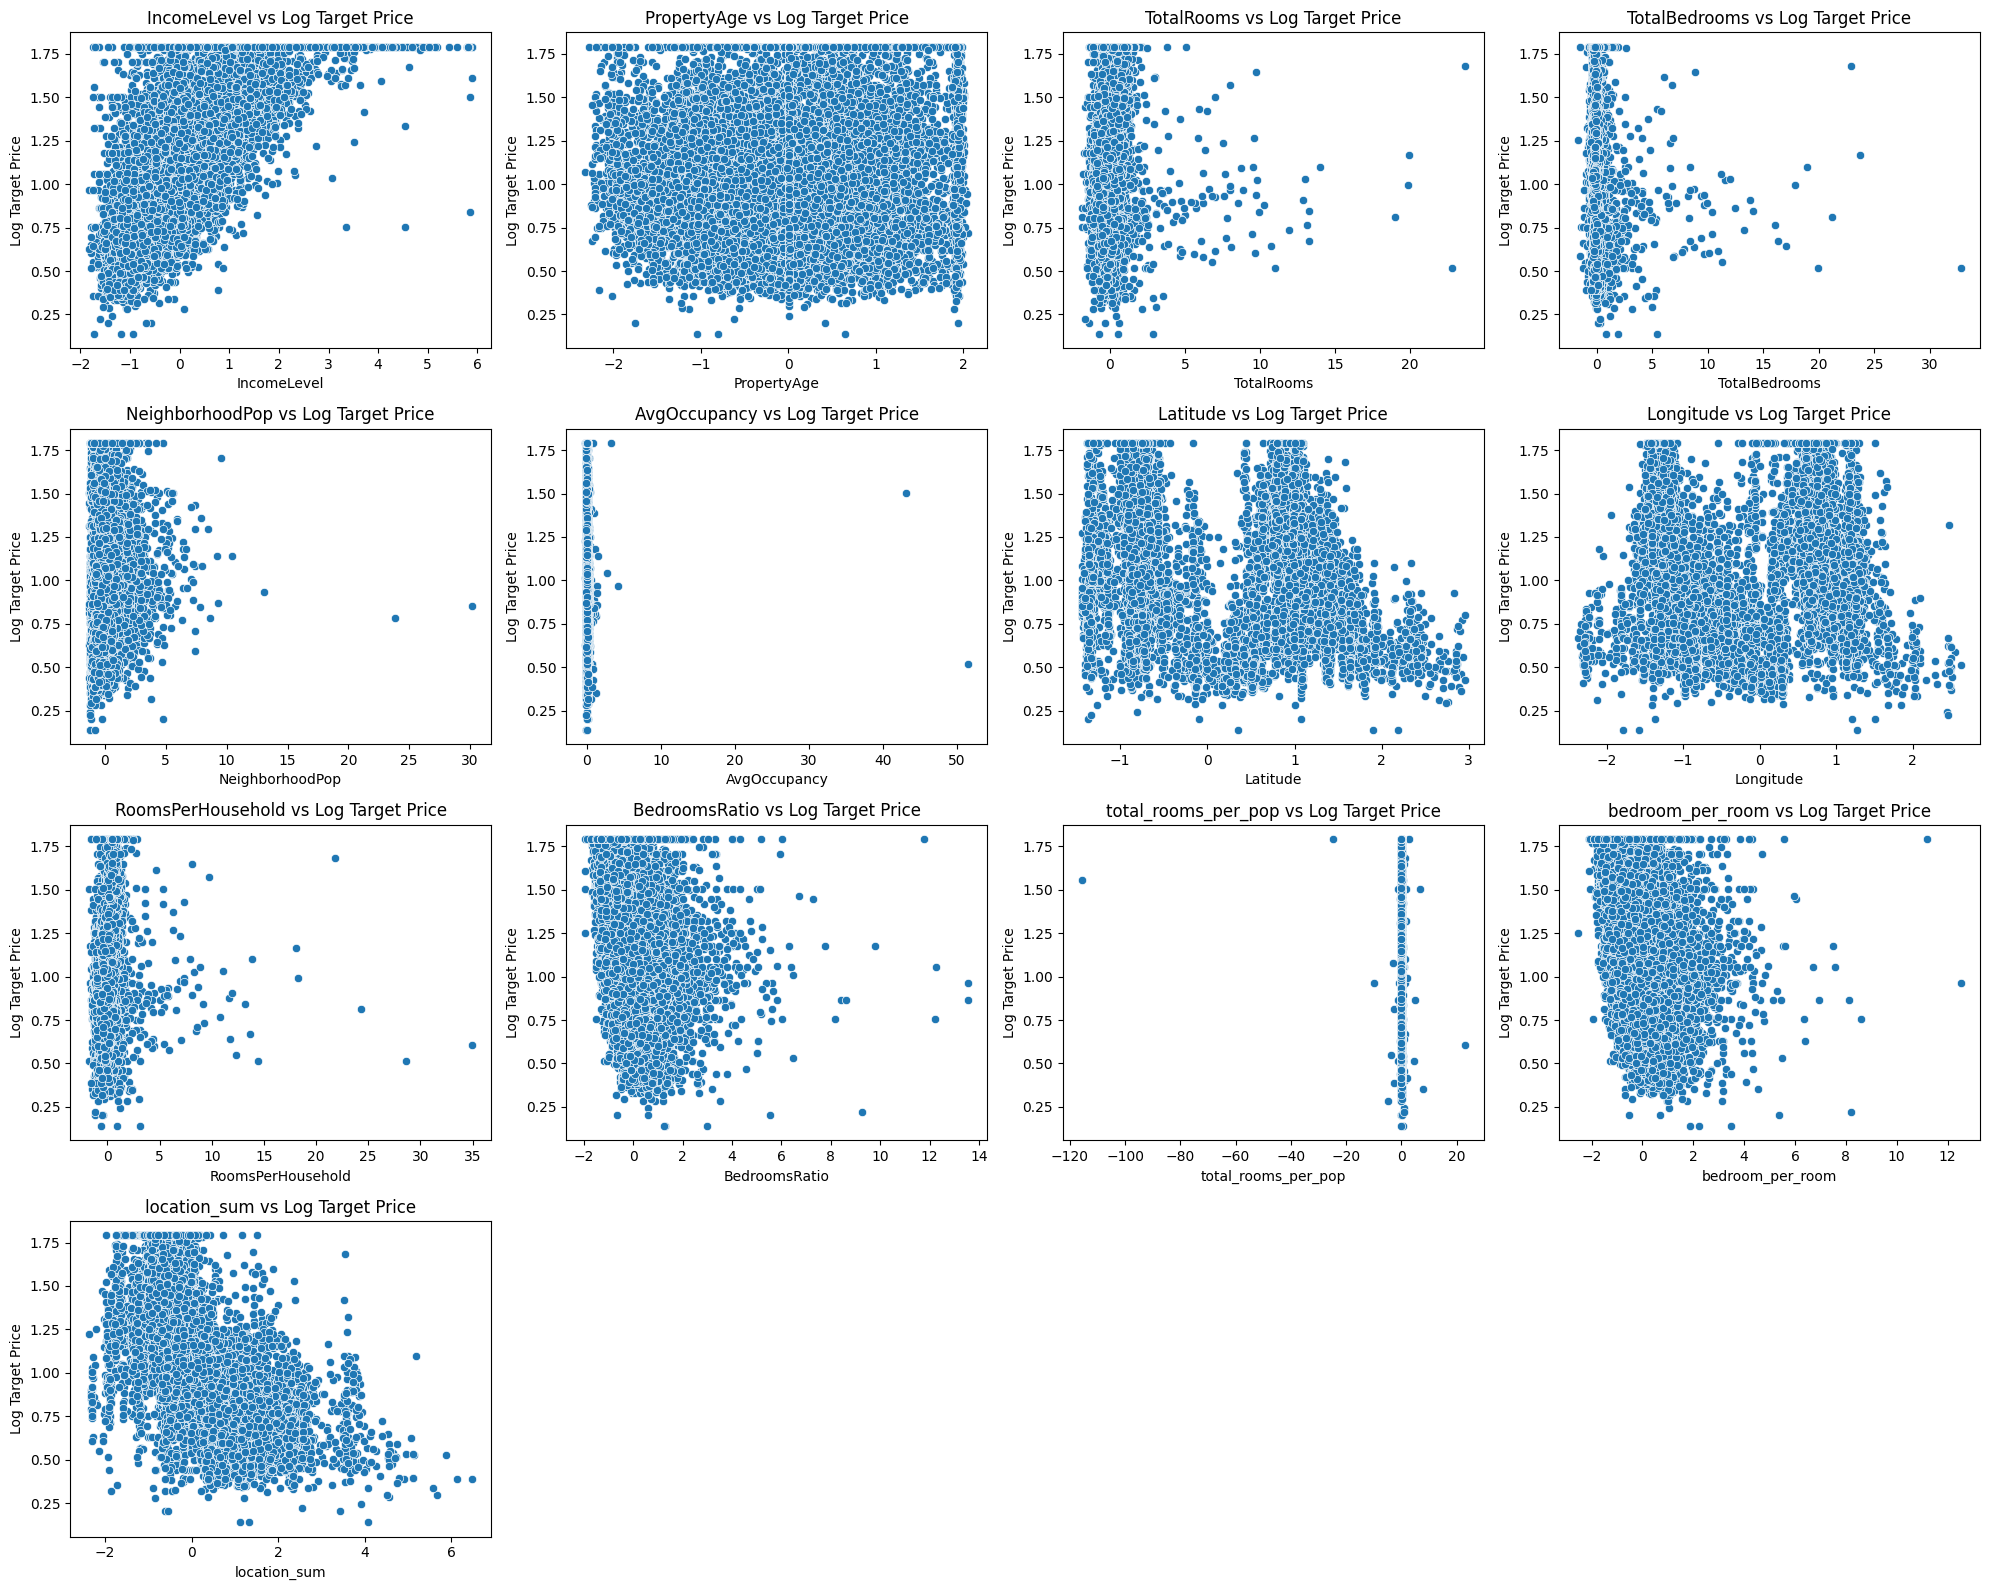

In [93]:
num_features = len(X_train.columns)
n_cols = 4
n_rows = (num_features + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 5, n_rows * 4))
for i, col in enumerate(X_train.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.scatterplot(x=X_train[col], y=y_train)
    plt.title(f'{col} vs Log Target Price')
    plt.xlabel(col)
    plt.ylabel('Log Target Price')
plt.tight_layout()
plt.show()

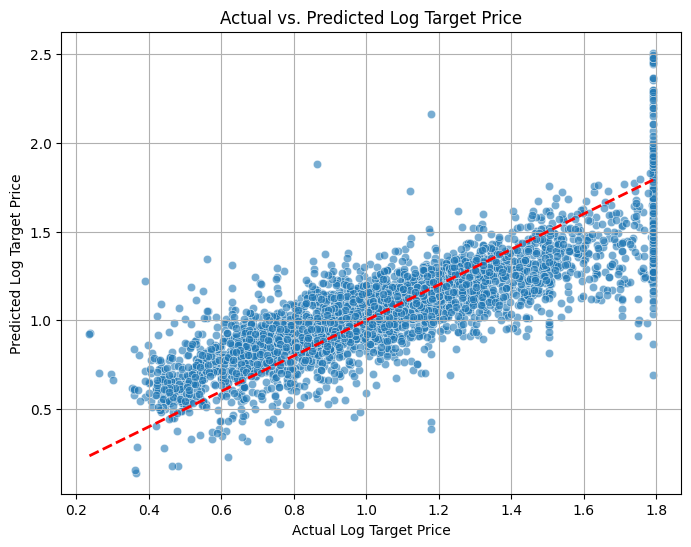

In [94]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_val, y=y_pred_val, alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.title('Actual vs. Predicted Log Target Price')
plt.xlabel('Actual Log Target Price')
plt.ylabel('Predicted Log Target Price')
plt.grid(True)
plt.show()

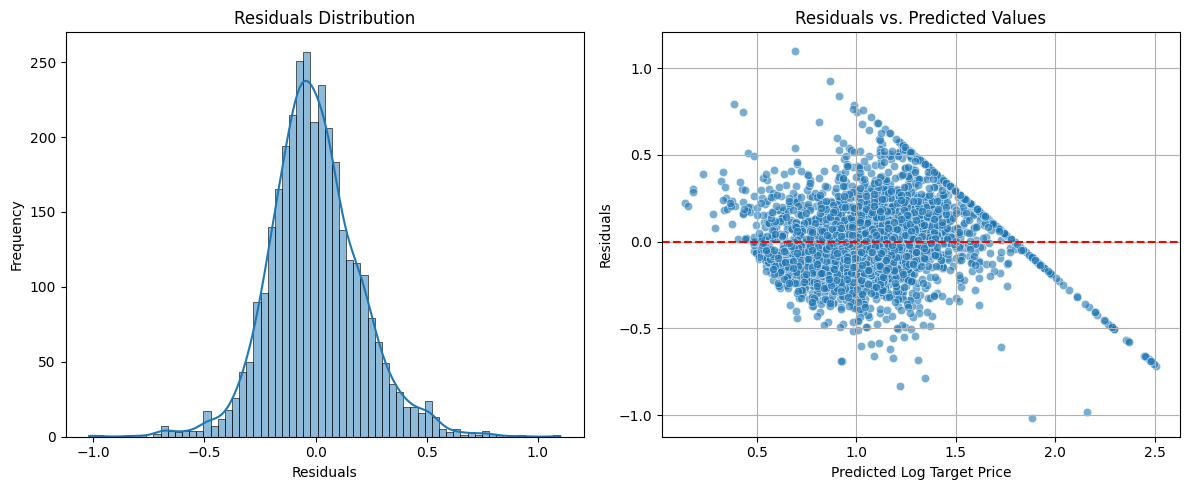

In [95]:
residuals = y_val - y_pred_val

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_pred_val, y=residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Log Target Price')
plt.ylabel('Residuals')
plt.grid(True)

plt.tight_layout()
plt.show()